###### M23 COM- ARTIFICIAL NEURAL NETWORKS.





















by
George Ofege
SID: 6056625
April 2018







## Abstract:

This Paper examines the use of a Neural Network on an image dataset for image recognition. The The Oxford-IIIT Pet Dataset Is used extensively in this paper. This paper aims to build a model which can learn from a large sample of pohots to recognise the differet breeds of pets which are available. In this paper, we consider the methodology behind building mutclass Neural problems, specifically in image processing through a convulutional Neural network.

# Problem and DataSet #

The available dataset on which we intend to build our model consists of rouchly 37 different categories of cats and dogs, each with their breed notations as the file name. The full specifications of  the DataSet will be discussed shortly. 

# Classifiers
The problem consists of categorical variables (37 in  number), each the names of the specific bread of the pet. The main type of network to be used in training our model to recognise these different types of cats and dogs will be th COnvolutional Neural Network. With this we can specify the iput variable X, as an array with several inputs as matrices, the out put will be a categorical classifcation of the animals, with a certain degree of accuracy


# Methods and Experimental Setup
### Preprocessing
Preparing the Data, just looking through the data we can stan start to spot some things we would want to account for when building our modle but firt we import all the necessary libraries that would  be used.

In [1]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BÃ¼hler for this suggestion
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.cross_validation import train_test_split
from sklearn.metrics import*
from PIL import Image
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras.layers import Dense

TRAIN_DIR = 'E:/pheon/Documents/DataSets/images_breeds/images'
TEST_DIR = 'E:/pheon/Documents/DataSets/Test/test'
IMG_SIZE =150
LR = 1e-3

MODEL_NAME = 'dogbreedsvscatbreeds-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which saved model is which, sizes must match

c:\users\pheon\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


AttributeError: module 'tensorflow.python.training.checkpointable' has no attribute 'CheckpointableBase'

## Feature extraction
WE can now begin to extract features from the data available. We create functions that will loop through lll the  images avaiable and convert the names into np  arrays as well as read the images and place ina separate array.

The function below will looop through the name of the file and remove any nummbers preset. this gives us a better distribution of the available target classes. it then returns a text type value of the category, and this is appended in another  list

We check the data to see if there are any inconsistencies and files formats that might be troublesome to our data. As see below, there are 3 .mat image files in the data and our rescaler would not work on these files. Given that its just three, it is safe to account for these and keep them out of the training vectors array. The output below shows th e presence of these mat files.

In [2]:
def label_img(img):
    text_category_label = ''.join([i for i in img if not i.isdigit()])
    text_category_label.split('.')[:-1]
    
    return text_category_label
    

a = os.listdir(TRAIN_DIR)[400:415]
b = a[2500:2510]
for img in tqdm(os.listdir(TRAIN_DIR)[400:415]):
    labal = label_img(img)
    
counter = 0
for item in os.listdir(TRAIN_DIR):
    if item.endswith(".mat"):
        #print(item)
        
        counter +=1
        #os.remove(os.path.join(os.listdir(TRAIN_DIR)[:15], item))
print(counter)

NameError: name 'TRAIN_DIR' is not defined

The methods below will convert the images into vector arrays and returns of the list of this.

In [3]:
def image_to_vector(image, size=(IMG_SIZE,IMG_SIZE)):

	return cv2.resize(image, size).flatten()

categorical_labels = []
def create_train_data():
    training_data = []
    for img in os.listdir(TRAIN_DIR):
        #label = label_img(img)
        #print(img)
        if  img.endswith(".jpg"):
            path = os.path.join(TRAIN_DIR,img)
            image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if image is not None:
                label = label_img(img)
                feature = image_to_vector(image)
                training_data.append([np.array(feature)])
                categorical_labels.append(label)
    #shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data


The function aabove yields two lists, one for the training data (image data) and the other, full of target variables for each image generated by the function.. It is worth noting that the function will skip theough any image that cannot be read by the inbuilt function imread. this is done as some of the images cannot be opened by imread for some rreason. This does not yield an exception so we end uup getting an unresizeable image error. (When the images are acquired, they are resized so our inputs match).

Now, we can now create the training data.

In [5]:
train_data = create_train_data()
#If you have already created the dataset:
#train_data = np.load('train_data.npy')

#print(categorical_labels)
#print(train_data[:5])

In [16]:
le = LabelEncoder()

categorical_labels_fin = le.fit_transform(categorical_labels)
len(categorical_labels_fin)

7384

We scale the input of image to be in the range [0,1], then transform these lables into vectors, ranging right up to the number of clases, that is, the vector for each available label is created and the index for the category it falls in (within the 37 categories), is set to 1

In [7]:
categorical_labels_fin = np_utils.to_categorical(categorical_labels_fin, 37)


In [8]:
print(categorical_labels_fin)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


We can now begin partitioning our data into training and test sets, our divion betwen these is 0.3, 0.7 (70 % of the data willl be used as training, while 30& for testing.)

In [9]:
(trainingSet, testSet, trainingCategories, testCategories) = train_test_split(train_data, categorical_labels_fin, test_size=0.3, random_state =2)

# Convolutional Neural Network

Defininf the parameters of ourr Neural Network. 
our neural network takes inputs in its input layer of size(32 by 32, ?), or (64 by 64), these are then these are then passes in through the inner convolution layer. our activation function is 'relu' activation. We can define another inner convlution layer to enhance our results.

The Model's Learning rate is set and defined above.and we are using the Adam optimizer
our loss is categorical_crossentropy.
We also define a fully connected layer which will map the output of the Pooling layers, one of which will use softmax activation.

In [10]:
import tflearn
import tensorflow as tf
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from keras.layers.convolutional import Conv2D
tf.reset_default_graph()

convnet = input_data(shape=[None, 150, 150, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.4)

convnet = fully_connected(convnet, 37, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')
#model2 = Sequential([Conv2D(76, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)), Flatten(), Dense(2, activation='softmax')])
#model2.add(Dense(51680000, input_dim=IMG_SIZE, init="uniform", activation="relu"))
#model2.add(Dense())

Instructions for updating:
Use the retry module or similar alternatives.
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


We now have a 2 layerred neural network with a fully connected layer and an output layer.

we restructure our data so it can fit into our input layer of the convolutional network. Now we have two sets of data, already split, the training data and then the test data. The test Data is meant to act  as a validation set and used to access the accuracy of our model. 

In [11]:
X = np.array([i for i in trainingSet]).reshape(-1,150,150,1)
Y = [i for i in trainingCategories]

test_x = np.array([i for i in testSet]).reshape(-1,150,150,1)
test_y = [i for i in testCategories]

#print(trainingSet[:7385])

## BUILDING THE MODEL





Begining with just 3 epochs

In [57]:
model.fit({'input': X}, {'targets': Y}, n_epoch=40, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)
    
    
#model2.compile(Adam(LR, loss='categorical_crossentropy', metrics=['accuracy']))

Training Step: 5605  | total loss: 0.49000 | time: 32.595s
| Adam | epoch: 030 | loss: 0.49000 - acc: 0.9057 -- iter: 1024/5168


KeyboardInterrupt: 

our model doesn't perform well at all, with an accuracy of 0.02 over 3 epochs there is a problem with the modelling, we can attribute this to the pixel densities used or the fact that the categories are too closely related as there are cats and dogs, similar in nature and more challenging to recognize however we can do some more to improve our model

We try again, to see if we can have any significant improvments by adding another convolutional layer to the model

# Adding a layer #


tf.reset_default_graph()

convnet = input_data(shape=[None, 32, 32, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 37, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



#

#train = train_data[:-500]
#test = train_data[-500:]

X = np.array([i for i in trainingSet]).reshape(-1,32,32,1)
Y = [i for i in trainingCategories]

test_x = np.array([i for i in testSet]).reshape(-1,32,32,1)
test_y = [i for i in testCategories]

model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

SO we can see some imporvements in the accuracy and much lower loss, but not even nearly significant enough for the model to be considerable.

In [58]:
import matplotlib.pyplot as plt

fig=plt.figure()
model.load(MODEL_NAME)

INFO:tensorflow:Restoring parameters from C:\Users\pheon\AppData\Local\Programs\Python\Python35\Scripts\dogbreedsvscatbreeds-0.001-2conv-basic.model


<Figure size 432x288 with 0 Axes>

# Visually inspecting our network #

In [13]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)[:5]):
        path = os.path.join(TRAIN_DIR,img)
        img_num = img.split('.')[:-1]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [14]:
#A = process_test_data()
categorical_labels_map = []
for num in categorical_labels_fin[1000]:
    categorical_labels_map.append([np.argmax(num), num])

    
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
le_name_mapping[17]



'chihuahua_.jpg'

In [59]:
### import matplotlib.pyplot as plt

fig=plt.figure()
size = (IMG_SIZE,IMG_SIZE)
one_hot_predictions = []

from __future__ import print_function
import numpy as np

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

for num,data in enumerate(train_data):

    path = os.path.join(TRAIN_DIR,img)
    #for img_data in os.listdir(TRAIN_DIR)[:15]:
    #y = fig.add_subplot(2,3,num+1)
    orig_m = data[0]
    #image = cv2.imread(orig_m)
    data_im = data[0].reshape(150,150, 1)
    model_out = model.predict([data_im])
    one_hot_predictions.append(np.argmax(model_out))
    
    #
    #print(data)
        
    #y.imshow(orig_m.squeeze(), cmap='gray')
    m_orig = orig_m.reshape(150,150)
    #valid_imshow_data(m_orig)
    #y.imshow(m_orig, cmap='gray')
    #plt.title(le_name_mapping[np.argmax(model_out)])
    #y.axes.get_xaxis().set_visible(False)
    #y.axes.get_yaxis().set_visible(False)
plt.show()

#for img_data in os.listdir(TRAIN_DIR)[:2]:
    #path = os.path.join(TRAIN_DIR,img_data)
    #image = cv2.imread(path)
    #s_image = cv2.resize(image, size).flatten()
    #y.imshow(image)
    #print (image)
#plt.show()



<Figure size 432x288 with 0 Axes>

In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  # Version 1.0.0 (some previous versions are used in past commits)
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

%matplotlib inline

import os


Precision: 70.44313766104206%
Recall: 68.87865655471289%
f1_score: 69.13001216893664%

Confusion Matrix:
[[140   2   0 ...   1   4   3]
 [  2 144   1 ...   2   1   7]
 [  1   2 135 ...   0   1   0]
 ...
 [  0   9   0 ... 123   3   2]
 [  0   1   1 ...   0 154   6]
 [  2   9   0 ...   0   9 135]]

Confusion matrix (normalised to % of total test data):
[[1.8959913  0.02708559 0.         ... 0.0135428  0.05417118 0.04062838]
 [0.02708559 1.9501624  0.0135428  ... 0.02708559 0.0135428  0.09479957]
 [0.0135428  0.02708559 1.8282773  ... 0.         0.0135428  0.        ]
 ...
 [0.         0.12188515 0.         ... 1.6657637  0.04062838 0.02708559]
 [0.         0.0135428  0.0135428  ... 0.         2.0855906  0.08125677]
 [0.02708559 0.12188515 0.         ... 0.         0.12188515 1.8282773 ]]
Note: training and testing data is not equally distributed amongst classes, 
so it is normal that more than a 6th of the data is correctly classifier in the last category.


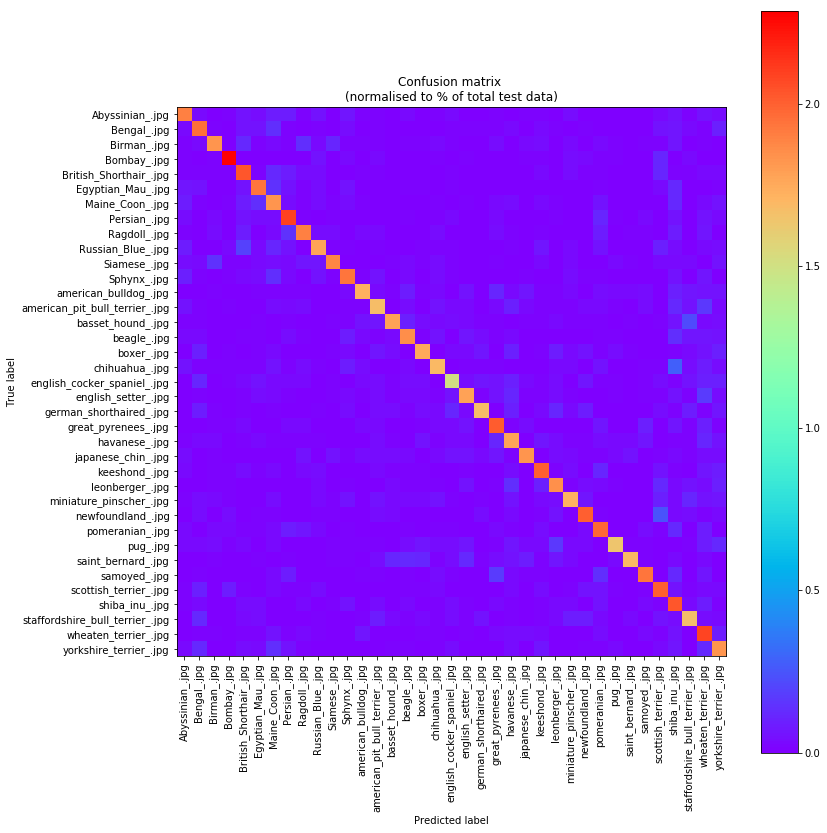

In [66]:
# Results

predictions = one_hot_predictions

#print("Testing Accuracy: {}%".format(100*accuracy))

print("")
print("Precision: {}%".format(100*metrics.precision_score(categorical_labels_fin, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(categorical_labels_fin, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(categorical_labels_fin, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(categorical_labels_fin, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results: 
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(37)
plt.xticks(tick_marks, le.classes_, rotation=90)
plt.yticks(tick_marks, le.classes_)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [62]:
##y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(categorical_labels_fin, predictions)
print(confusion_matrix)

[[140   2   0 ...   1   4   3]
 [  2 144   1 ...   2   1   7]
 [  1   2 135 ...   0   1   0]
 ...
 [  0   9   0 ... 123   3   2]
 [  0   1   1 ...   0 154   6]
 [  2   9   0 ...   0   9 135]]


In [65]:
le_name_mapping

{0: 'Abyssinian_.jpg',
 1: 'Bengal_.jpg',
 2: 'Birman_.jpg',
 3: 'Bombay_.jpg',
 4: 'British_Shorthair_.jpg',
 5: 'Egyptian_Mau_.jpg',
 6: 'Maine_Coon_.jpg',
 7: 'Persian_.jpg',
 8: 'Ragdoll_.jpg',
 9: 'Russian_Blue_.jpg',
 10: 'Siamese_.jpg',
 11: 'Sphynx_.jpg',
 12: 'american_bulldog_.jpg',
 13: 'american_pit_bull_terrier_.jpg',
 14: 'basset_hound_.jpg',
 15: 'beagle_.jpg',
 16: 'boxer_.jpg',
 17: 'chihuahua_.jpg',
 18: 'english_cocker_spaniel_.jpg',
 19: 'english_setter_.jpg',
 20: 'german_shorthaired_.jpg',
 21: 'great_pyrenees_.jpg',
 22: 'havanese_.jpg',
 23: 'japanese_chin_.jpg',
 24: 'keeshond_.jpg',
 25: 'leonberger_.jpg',
 26: 'miniature_pinscher_.jpg',
 27: 'newfoundland_.jpg',
 28: 'pomeranian_.jpg',
 29: 'pug_.jpg',
 30: 'saint_bernard_.jpg',
 31: 'samoyed_.jpg',
 32: 'scottish_terrier_.jpg',
 33: 'shiba_inu_.jpg',
 34: 'staffordshire_bull_terrier_.jpg',
 35: 'wheaten_terrier_.jpg',
 36: 'yorkshire_terrier_.jpg'}

In [63]:
from sklearn.metrics import accuracy_score
print('Testing accuracy of C.N.N  classifier on test set: {:.2f}'.format(accuracy_score(categorical_labels_fin, predictions)))

Testing accuracy of C.N.N  classifier on test set: 0.69


## Discussion and Conclusions

Evidently, our model suffers as it is not able to correctly classify the various species or cats and dogs to an acceptable margin. We can still apply several other techniques to try and improve this result, but at accuracy levels of 0.06 max, that suggests we might need more preprocessing or data in order to make acceptable classifications.

One of the reasons why the model may not be able to classify these accurately may be how closely related in species our animal breeds are, with over 37 different categories, it will be very difficult for the model to idetify such wide ranges given such little variations in features.

Another reason could be that the data is not enormous enough, with just about 200 samples of each of the pet species, the model might not obtain enough data to account for small changes.

Another dataset, is provided which is meant to aid in predictions containing pixel Trimaps of the differernt species. This data (inclusive of other specifications and annotations) was however not available at the time of this research 